# Capítulo 3. Análisis exploratorio de los datos

## Unidad 2. Exploración óptima de datos con Pandas
<br>

#### Mtro. Eduardo de Avila Armenta
edavilaa@uaz.edu.mx

<br>

En esta Unidad, nos enfocaremos en el uso de la librería **Pandas**, una de las librerías más populares y potentes en Python para la manipulación y análisis de datos. Diseñada específicamente para trabajar con datos estructurados. Pandas nos ofrece distintas herramientas que facilitarán tareas específicas de Ciencias de Datos e Inteligencia Artificial, entre ellas: limpieza, transformación, agregación y análisis de grandes volúmenes de datos de forma rápida y eficiente. 

El contenido de esta unidad se desglosa a continuación: 

- `1. Pipelines: Estructura de datos según el tipo de datos`
- `2. Serie Pandas y DataFrames`
- `3. Fusión y vinculación de DataFrames`
- `4. Análisis de las características de los datos a través de estadísticas descriptivas y muestras de datos`

Es importante entender algunos conceptos clave en este capítulo:

- **Pipeline:** flujo de procesamiento de datos que organiza y encadena las etapas de limpieza y transformación de datos en pandas. 
- **Serie:** estructura unidimensional de datos en pandas, similar a una columna, que permite manipulación y análisis rápidos de datos individuales.
- **DataFrame:** estructura bidimensional de pandas similar a una tabla, que facilita el trabajo con datos organizados en filas y columnas.
- **Fusión y vinculación:** métodos para combinar DataFrames y unificar datos de múltiples fuentes.
-  **Estadísticas descriptivas:** medidas para explorar y resumir características clave de los datos (media, mediana, desviación estándar).


Pandas, al igual que otras librerías, nos proporciona documentación que podemos requerir para tareas específicas, la documentación la puedes encontrar en: https://pandas.pydata.org/docs/user_guide/index.html#user-guide

Para la instalación, desde la terminal podemos utilizar el comando `pip install pandas`, o bien, directamente desde un código podemos utilizar el código: 

``` python
import sys
import subprocess

subprocess.check_call([sys.executable, "-m", "pip", "install", "pandas"]) if "pandas" not in sys.modules else None
```

¡Empecemos!

<div style="text-align: center;">
    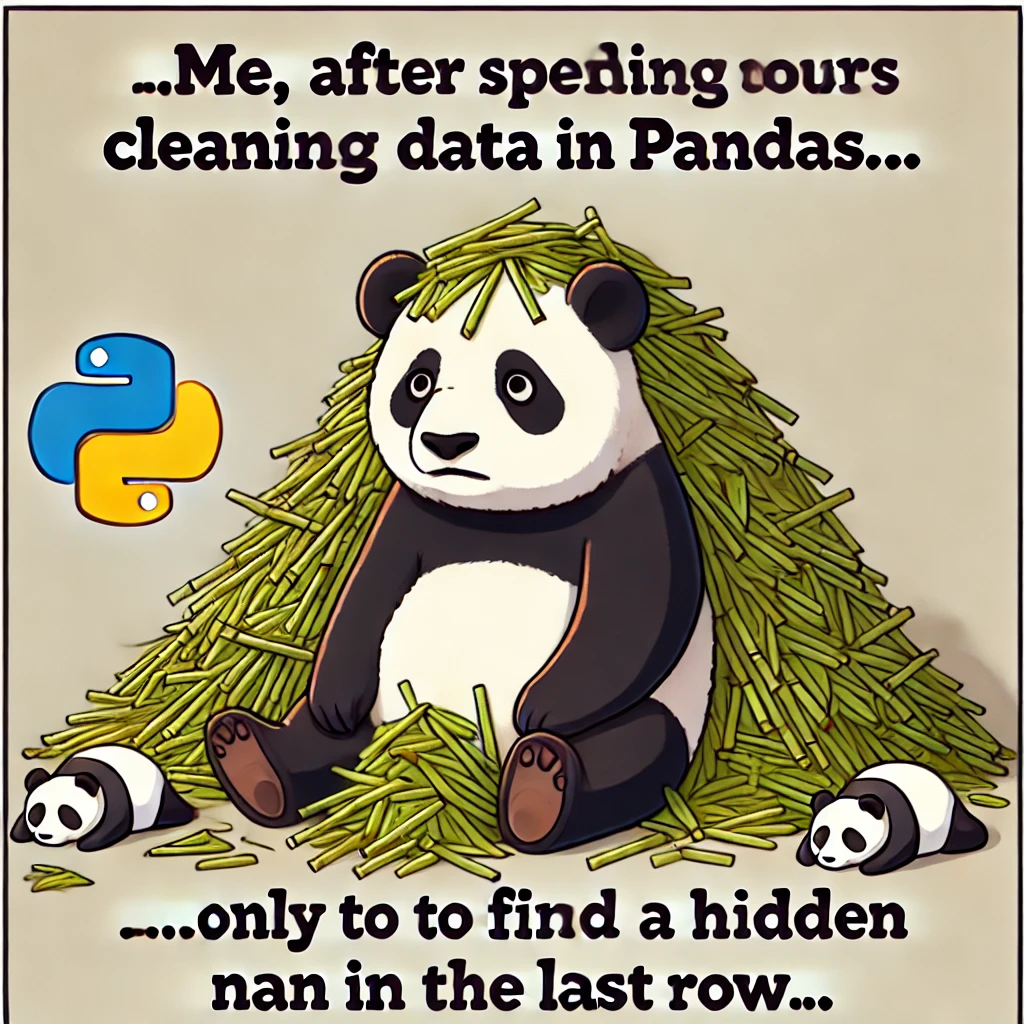
</div>




## 2.1 Pipeline en Pandas

Ejemplo de un Pipeline en Pandas con Datos Estructurados

In [1]:
import pandas as pd

# Crear un DataFrame de ejemplo
data = {
    'Nombre': ['Ana', 'Juan', 'Luis', 'María', 'Carlos'],
    'Edad': [25, None, 30, 45, None],
    'Salario': [50000, 60000, None, 80000, 50000]
}
df = pd.DataFrame(data)

# Aplicar un pipeline de transformación
df = (
    df
    .dropna(subset=['Edad'])                      # Eliminar filas con valores nulos en la columna 'Edad' (Limpieza de datos)
    .fillna({'Salario': df['Salario'].mean()})    # Rellenar nulos en 'Salario' con el promedio de la columna (Imputación de datos)
    .assign(Edad=df['Edad'] + 1)                  # Aumentar la edad en 1 año (Transformación de datos - Actualización - Mantenimiento)
    .rename(columns={'Nombre': 'Empleado'})       # Renombrar columna 'Nombre' a 'Empleado' (Manipulación de características)
)

print(df)

  Empleado  Edad  Salario
0      Ana  26.0  50000.0
2     Luis  31.0  60000.0
3    María  46.0  80000.0


Ejemplo de un Pipeline en Pandas con Datos no Estructurados

In [11]:
import pandas as pd

# Crear un DataFrame de ejemplo con datos no estructurados
data = {
    'Empleado': ['Ana', 'Juan', 'Luis', 'María', 'Carlos'],
    'Comentarios': [
        "Empleado del mes en Enero. Excelente rendimiento.",
        "Ascendido a gerente en 2023, gran potencial.",
        "Rendimiento promedio, mejorar puntualidad.",
        "Empleado destacado. Reconocimiento en Febrero.",
        "Sin comentarios adicionales."
    ]
}
df = pd.DataFrame(data)

# Pipeline de procesamiento para transformar datos no estructurados
df = (
    df
    .assign(
        # Convertir texto a minúsculas
        Comentarios=lambda x: x['Comentarios'].str.lower(),
        
        # Extraer palabras clave como "empleado del mes" o "ascendido"
        Es_Empleado_Mes=lambda x: x['Comentarios'].str.contains("empleado del mes"),
        Es_Ascendido=lambda x: x['Comentarios'].str.contains("ascendido"),
        
        # Clasificar el rendimiento basado en palabras clave
        Rendimiento=lambda x: x['Comentarios'].apply(
            lambda comentario: "Excelente" if "excelente" in comentario else 
                               "Bueno" if "destacado" in comentario else 
                               "Promedio" if "promedio" in comentario else 
                               "Sin información"
        )
    )
    
    # Eliminar la columna de comentarios originales si no es necesaria
    .drop(columns=['Comentarios'])
)

print(df)

  Empleado  Es_Empleado_Mes  Es_Ascendido      Rendimiento
0      Ana             True         False        Excelente
1     Juan            False          True  Sin información
2     Luis            False         False         Promedio
3    María            False         False            Bueno
4   Carlos            False         False  Sin información


## 2.2 Serie Pandas y DataFrames

### Series Pandas

In [13]:
# En un ambiente de análisis de datos/IA es necesario importar también numpy 

import numpy as np 
import pandas as pd

In [16]:
# Pandas puede soportar trabajar con listas y convertirla a series
pd.Series(['Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female'])

0      Male
1    Female
2      Male
3      Male
4    Female
5    Female
6    Female
dtype: object

In [17]:
# También, Pandas soporta trabajar con ndarrays y convertirla a series
pd.Series(np.array(['Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female']))

0      Male
1    Female
2      Male
3      Male
4    Female
5    Female
6    Female
dtype: object

In [18]:
# Podemos verificar el tipo de dato que es una serie de esta forma
ser=pd.Series(np.array(['Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female']))
type(ser)

pandas.core.series.Series

In [19]:
# También se presentarán casos en donde tenemos diccionarios y podemos convertirlo a series
dict_data={'a':1, 'b':2, 'c':3} 

ser1=pd.Series(dict_data)
print(ser1)
type(ser1)

a    1
b    2
c    3
dtype: int64


pandas.core.series.Series

In [21]:
# Cuando tenemos una Serie, nos van a importar dos características: índice y valores

print(ser1.index)
print(ser1.values)

Index(['a', 'b', 'c'], dtype='object')
[1 2 3]


In [26]:
# Pandas tiene la capacidad de trabajar con datos no homogéneos (por lo que hay que tener cuidado en aplicaciones reales)

list_data=['2019-01-02', 3.14, 'ABC', 100, True]
ser2=pd.Series(list_data)
print(ser2)
print(ser2.index) # Si no se tiene un índice explícito, Pandas generará un rango (RangeIndex) por defecto

0    2019-01-02
1          3.14
2           ABC
3           100
4          True
dtype: object
RangeIndex(start=0, stop=5, step=1)


In [69]:
# Se puede crear una Serie utilizando listas de valores y especificando los índices

valores =[220, 215, 93, 64, 64]
eye =pd.Series(data=valores, index=['Brown', 'Blue', 'Blue', 'Hazel', 'Green'])

print(eye)

Brown    220
Blue     215
Blue      93
Hazel     64
Green     64
dtype: int64


### Elementos y propiedades de las Series

In [38]:
eye=pd.Series({'Brown':220, 'Blue':215, 'Hazel':93, 'Green':64})

# Podemos ponerle un nombre a una serie, esto nos ayudará para cuando queramos concatenar una serie en una base de datos 

print("Nombre original: ",eye.name)

eye.name="eye_color"

print("Nombre cambiado: ",eye.name)

Nombre original:  None
Nombre cambiado:  eye_color


In [51]:
# Podemos acomodar la serie por valores 
eye=pd.Series({'Brown':220, 'Blue':215, 'Hazel':93, 'Green':64, 'Canelita Pasion':None})

print(eye)
print(eye.sort_values())
print(eye.sort_values(ascending=False,na_position="first"))

Brown              220.0
Blue               215.0
Hazel               93.0
Green               64.0
Canelita Pasion      NaN
dtype: float64
Green               64.0
Hazel               93.0
Blue               215.0
Brown              220.0
Canelita Pasion      NaN
dtype: float64
Canelita Pasion      NaN
Brown              220.0
Blue               215.0
Hazel               93.0
Green               64.0
dtype: float64


In [55]:
# Podemos acomodar la serie por índices 
eye=pd.Series({'Brown':220, 'Blue':215, 'Hazel':93, 'Green':64})

print(eye)
print(eye.sort_index())
print(eye.sort_index(ascending=False,na_position="first"))

Brown    220
Blue     215
Hazel     93
Green     64
dtype: int64
Blue     215
Brown    220
Green     64
Hazel     93
dtype: int64
Hazel     93
Green     64
Brown    220
Blue     215
dtype: int64


In [67]:
# Podemos obtener información de los valores únicos en la serie y el número de valores únicos

eye=pd.Series({'Brown':220, 'Blue':215, 'Hazel':93, 'Green':64, 'Canelita Pasion':220})

print("Valores únicos: ",eye.unique(),"\n")
print("Número de valores únicos: ",eye.nunique(),"\n")
print("Contar el total de apariciones:\n",eye.value_counts())

Valores únicos:  [220 215  93  64] 

Número de valores únicos:  4 

Contar el total de apariciones:
 220    2
215    1
93     1
64     1
Name: count, dtype: int64


In [78]:
# Podemos acceder a valores de una serie con la posición o con el índice
ser=pd.Series([0,10,20,30,40], index=['a','b','c','d','e'])

print("Accediendo a valores específicos: ",ser[3],ser['d'],'\n')

# También podemos acceder a porciones de la serie utilizando rangos
print("Accediendo a rangos específicos:\n",ser[1:3])

Accediendo a valores específicos:  30 30 

Accediendo a rangos específicos:
 b    10
c    20
dtype: int64


### Operaciones con series

In [80]:
ser1=pd.Series([0,1,2,3,4], index=[0,1,2,3,4])
ser2=pd.Series([0,1,2,3,4], index=[4,3,2,1,0])
print(ser1)
print(ser2)

0    0
1    1
2    2
3    3
4    4
dtype: int64
4    0
3    1
2    2
1    3
0    4
dtype: int64


In [84]:
# Operaciones con operadores matemáticos

print("Suma de series: \n",ser1+ser2,"\n")
print("Mult de series: \n",ser1*ser2,"\n")
print("Div de series: \n",ser1/ser2)

Suma de series: 
 0    4
1    4
2    4
3    4
4    4
dtype: int64 

Mult de series: 
 0    0
1    3
2    4
3    3
4    0
dtype: int64 

Div de series: 
 0    0.000000
1    0.333333
2    1.000000
3    3.000000
4         inf
dtype: float64


In [86]:
# Operaciones con funciones

print("Suma: ",ser1.sum())
print("\nPromedio: ",ser1.mean())
print("\nMediana: ",ser1.median())
print("\nMin, Max: ",ser1.min(),ser1.max())
print("\nDesviación Estándar: ",ser1.std())

Suma:  10

Promedio:  2.0

Mediana:  2.0

Min, Max:  0 4

Desviación Estándar:  1.5811388300841898


In [89]:
# Podemos utilizar la función apply y la función lambda para aplicar un procesamiento a toda la serie

ser_height=pd.Series([160,170,180],name='height')
print(ser_height)

plus_10=lambda x:x+10
ser_height.apply(lambda x:x+10)

0    160
1    170
2    180
Name: height, dtype: int64


0    170
1    180
2    190
Name: height, dtype: int64

## DataFrames

In [28]:
# Un dataframe se crea de series

df = pd.DataFrame({"Name": ["Braund, Mr, Owen Harries",
                       "Allen, Mr. William Henry",
                       "Bonnel, Miss. Elizabeth"],
              "Age": [22, 35, 58],
              "Sex": ["male", "male", "female"]})
df

,Name,Age,Sex
0,"Braund, Mr, Owen Harries",22,male
1,"Allen, Mr. William Henry",35,make
2,"Bonnel, Miss. Elizabeth",58,female


In [29]:
print(df['Age'])     # Accediendo a una serie/característica
print(df['Age'][0])  # Accediendo a un dato en específico

print(type(df['Age']),type(df['Age'][0]))

0    22
1    35
2    58
Name: Age, dtype: int64
22
<class 'pandas.core.series.Series'> <class 'numpy.int64'>


In [33]:
# Dataframe con datos numéricos (similar a una matriz de numpy)

df = pd.DataFrame([[1,2,3],[4,5,6],[7,8,0]])

df #df[0]

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,0


### Inspección de un DataFrame

In [95]:
df = pd.DataFrame({"Name": ["Braund, Mr, Owen Harries",
                       "Allen, Mr. William Henry",
                       "Bonnel, Miss. Elizabeth"],
              "Age": [22, 35, 58],
              "Sex": ["male", "male", "female"]})

# Podemos acceder a las primeras filas del dataframe
print(df.head(2),"\n")

# También es posible mostrar información general del DataFrame
print(df.info(),"\n")

# Resumen estadístico de las columnas numéricas
print(df.describe())

                       Name  Age   Sex
0  Braund, Mr, Owen Harries   22  male
1  Allen, Mr. William Henry   35  male 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
 2   Sex     3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes
None 

             Age
count   3.000000
mean   38.333333
std    18.230012
min    22.000000
25%    28.500000
50%    35.000000
75%    46.500000
max    58.000000


### Selección y filtrado básico de datos

In [102]:
data = {
    'Nombre': ['Ana', 'Luis', 'Carlos'],
    'Edad': [23, 25, 30],
    'Ciudad': ['Madrid', 'Barcelona', 'Valencia']
}
df = pd.DataFrame(data,index=['a','b','c'])

# Seleccionar una columna (como Serie)
print(df['Edad'],"\n")

# Seleccionar múltiples columnas
print(df[['Nombre', 'Ciudad']],"\n")

# Seleccionar filas por índice (iloc) o por etiquetas (loc)
print(df.iloc[0],"\n")  # Primera fila
print(df.loc['b'],"\n")   # Primera fila
print(df.iloc[:2],"\n") # Primeras dos filas
print(df[df['Edad'] > 24])  # Filtrar filas según una condición

a    23
b    25
c    30
Name: Edad, dtype: int64 

   Nombre     Ciudad
a     Ana     Madrid
b    Luis  Barcelona
c  Carlos   Valencia 

Nombre       Ana
Edad          23
Ciudad    Madrid
Name: a, dtype: object 

Nombre         Luis
Edad             25
Ciudad    Barcelona
Name: b, dtype: object 

  Nombre  Edad     Ciudad
a    Ana    23     Madrid
b   Luis    25  Barcelona 

   Nombre  Edad     Ciudad
b    Luis    25  Barcelona
c  Carlos    30   Valencia


### Añadir y modificar datos

In [103]:
# Añadir una nueva columna
df['Salario'] = [50000, 55000, 60000]

# Modificar una columna existente
df['Edad'] = df['Edad'] + 1
print(df)

   Nombre  Edad     Ciudad  Salario
a     Ana    24     Madrid    50000
b    Luis    26  Barcelona    55000
c  Carlos    31   Valencia    60000


### Eliminar datos por columnas o filas

In [108]:
# Eliminar una columna

df2 = df.copy()
print(df2,"\n")
df2 = df.drop(columns=['Salario'])
print(df2,"\n")
# Eliminar una fila
df2 = df2.drop(index='c')  # Elimina la fila con índice 1 (segunda fila)
print(df2)

   Nombre  Edad     Ciudad  Salario
a     Ana    24     Madrid    50000
b    Luis    26  Barcelona    55000
c  Carlos    31   Valencia    60000 

   Nombre  Edad     Ciudad
a     Ana    24     Madrid
b    Luis    26  Barcelona
c  Carlos    31   Valencia 

  Nombre  Edad     Ciudad
a    Ana    24     Madrid
b   Luis    26  Barcelona


### Operaciones de agrupamiento y agregación

In [119]:
# Agrupar datos por una columna y calcular la media
data = {
    'Nombre': ['Ana', 'Luis', 'Carlos', 'Ana'],
    'Edad': [23, 25, 30, 22],
    'Salario': [50000, 55000, 60000, 52000]
}
df = pd.DataFrame(data)

# Agrupar por nombre y calcular el promedio de Edad y Salario
print(df.groupby('Nombre').mean())

        Edad  Salario
Nombre               
Ana     22.5  51000.0
Carlos  30.0  60000.0
Luis    25.0  55000.0


### Fusionar (merging) y unir DF

In [149]:
# Crear dos DataFrames
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Nombre': ['Ana', 'Luis', 'Carlos']})
df2 = pd.DataFrame({'ID': [1, 2, 4], 'Salario': [50000, 55000, 60000]})

# Usar merge para unir DataFrames en base a la columna 'ID'
df_merged = pd.merge(df1, df2, on='ID')
print("DataFrame unido con merge:\n", df_merged)

# Concatenación vertical (uno debajo del otro)
# Ejemplo de cómo combinar DataFrames que tienen las mismas columnas
df_concat_vertical = pd.concat([df1, df2], ignore_index=True)
print("\nConcatenación vertical con concat:\n", df_concat_vertical)

# Concatenación horizontal (uno al lado del otro)
# Combinar dos DataFrames con diferentes columnas
df_concat_horizontal = pd.concat([df1, df2], axis=1)
print("\nConcatenación horizontal con concat:\n", df_concat_horizontal)

DataFrame unido con merge:
    ID Nombre  Salario
0   1    Ana    50000
1   2   Luis    55000

Concatenación vertical con concat:
    ID  Nombre  Salario
0   1     Ana      NaN
1   2    Luis      NaN
2   3  Carlos      NaN
3   1     NaN  50000.0
4   2     NaN  55000.0
5   4     NaN  60000.0

Concatenación horizontal con concat:
    ID  Nombre  ID  Salario
0   1     Ana   1    50000
1   2    Luis   2    55000
2   3  Carlos   4    60000


### Funciones apply y operaciones en columna 

In [120]:
# Aplicar una función lambda para transformar una columna
df['Edad_cuadrado'] = df['Edad'].apply(lambda x: x**2)
print(df,'\n')

# Operaciones matemáticas directas
df['Edad_doble'] = df['Edad'] * 2
print(df)

   Nombre  Edad  Salario  Edad_cuadrado
0     Ana    23    50000            529
1    Luis    25    55000            625
2  Carlos    30    60000            900
3     Ana    22    52000            484 

   Nombre  Edad  Salario  Edad_cuadrado  Edad_doble
0     Ana    23    50000            529          46
1    Luis    25    55000            625          50
2  Carlos    30    60000            900          60
3     Ana    22    52000            484          44


### Manejo de valores nulos

In [122]:
# Crear un DataFrame con valores nulos
df = pd.DataFrame({
    'Nombre': ['Ana', None, 'Carlos'],
    'Edad': [23, None, 30],
    'Salario': [50000, 55000, None]
})

# Detectar valores nulos
print(df.isnull(),"\n")

# Rellenar valores nulos con un valor específico
df = df.fillna({'Nombre': 'Desconocido', 'Edad': df['Edad'].mean()})
print(df,"\n")

# Eliminar filas con valores nulos
df = df.dropna()
print(df)

   Nombre   Edad  Salario
0   False  False    False
1    True   True    False
2   False  False     True 

        Nombre  Edad  Salario
0          Ana  23.0  50000.0
1  Desconocido  26.5  55000.0
2       Carlos  30.0      NaN 

        Nombre  Edad  Salario
0          Ana  23.0  50000.0
1  Desconocido  26.5  55000.0


### Filtrado condicionado

In [127]:
data = {
    'Nombre': ['Ana', 'Luis', 'Carlos'],
    'Edad': [23, 25, 30],
    'Ciudad': ['Madrid', 'Barcelona', 'Valencia']
}
df = pd.DataFrame(data,index=['a','b','c'])

# Seleccionar filas donde la 'Edad' es mayor de 24
print(df[df['Edad'] > 24],'\n')

# Seleccionar filas donde la 'Ciudad' es 'Madrid'
print(df[df['Ciudad'] == 'Madrid'])

   Nombre  Edad     Ciudad
b    Luis    25  Barcelona
c  Carlos    30   Valencia 

  Nombre  Edad  Ciudad
a    Ana    23  Madrid


### Multi-indexing

In [8]:
import numpy as np

# Definir los nombres de las columnas
my_header = ['a', 'b', 'c']

# Crear la primera parte del índice (nivel superior) con dos grupos 'G1' y 'G2', cada uno con 3 elementos
my_index_out = ['G1'] * 3 + ['G2'] * 3

# Crear la segunda parte del índice (nivel inferior) con los números 1, 2 y 3, repetidos para cada grupo
my_index_in = [1, 2, 3] * 2

# Combinar ambos niveles en tuplas (por ejemplo: ('G1', 1), ('G1', 2), ...)
my_index_zipped = list(zip(my_index_out, my_index_in))

# Crear un MultiIndex a partir de las tuplas, para que el DataFrame tenga dos niveles de índice
my_index = pd.MultiIndex.from_tuples(my_index_zipped)

# Crear el DataFrame con datos aleatorios de 6 filas y 3 columnas, utilizando el índice jerárquico y las columnas definidas
df = pd.DataFrame(data=np.random.randn(6, 3), index=my_index, columns=my_header)

# Mostrar el DataFrame resultante
df

a         b         c
G1 1  2.256280 -0.349974  0.207661
   2  1.637501  1.096154  0.313767
   3  0.139829 -0.572065  0.877973
G2 1  0.714631 -0.378125  0.866275
   2  0.023009  0.359407 -1.172692
   3 -0.199917 -0.756763 -0.824518

## Ejemplo práctico de uso de Pandas

### Ejemplo 1

In [128]:
iris_df=pd.read_csv('data_iris.csv')
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [144]:
print(iris_df.head(),"\n")
print(iris_df.tail(),"\n")
print(iris_df.columns,"\n")
print(iris_df.info())

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa 

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width    Species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica 

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width',
       'Species'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (

In [132]:
iris_df.columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']
iris_df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [143]:
iris_df.Sepal_Length
iris_df[['Sepal_Length']]

,Sepal_Length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
...,...
145,6.7
146,6.3
147,6.5
148,6.2


In [137]:
iris_df[['Sepal_Length', 'Sepal_Width']]

,Sepal_Length,Sepal_Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [140]:
iris_df[['Sepal_Length']]

,Sepal_Length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
...,...
145,6.7
146,6.3
147,6.5
148,6.2


In [146]:
# Agrupar por 'Species' y calcular la media y desviación estándar para 'Sepal_Length' y 'Sepal_Width'
result = iris_df.groupby('Species')[['Sepal_Length', 'Sepal_Width']].agg(['mean', 'std'])

result

Sepal_Length           Sepal_Width          
                   mean       std        mean       std
Species                                                
setosa            5.006  0.352490       3.418  0.381024
versicolor        5.936  0.516171       2.770  0.313798
virginica         6.588  0.635880       2.974  0.322497

In [147]:
result.T

Species              setosa  versicolor  virginica
Sepal_Length mean  5.006000    5.936000   6.588000
             std   0.352490    0.516171   0.635880
Sepal_Width  mean  3.418000    2.770000   2.974000
             std   0.381024    0.313798   0.322497

### Ejemplo 2

In [4]:
# Con pandas, podemos leer archivos de extensión xlsx y csv

df1 = pd.read_excel('stockprice.xlsx')
df2 = pd.read_excel('stock valuation.xlsx')

print("Información df1: \n",df1.info())
print(df1.head(),"\n")


print("Información df2: \n",df2.info())
print(df2.head(),"\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          10 non-null     int64  
 1   stock_name  10 non-null     object 
 2   value       10 non-null     float64
 3   price       10 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes
Información df1: 
 None
       id                               stock_name          value   price
0  128940                     Hanmi Pharmaceutical   59385.666667  421000
1  130960                                   CJ E&M   58540.666667   98900
2  138250                              NS Shopping   14558.666667   13200
3  139480                                   E-mart  239230.833333  254500
4  142280  Green Cross Medical Science Corporation     468.833333   10200 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  No

In [5]:
pd.merge(df1, df2)

,id,stock_name,value,price,name,eps,bps,per,pbr
0,130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
1,139480,E-mart,239230.833333,254500,E-mart,18268.166667,295780,13.931338,0.860437
2,145990,Samyang,82750.000000,82000,Samyang,5741.000000,108090,14.283226,0.758627
3,185750,Chong Kun Dang,40293.666667,100500,Chong Kun Dang,3990.333333,40684,25.185866,2.470259
4,204210,Mode Tour Reit,3093.333333,3475,Mode Tour Reit,85.166667,5335,40.802348,0.651359


In [6]:
pd.merge(df1, df2, on='id', how='left')

,id,stock_name,value,price,name,eps,bps,per,pbr
0,128940,Hanmi Pharmaceutical,59385.666667,421000,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,NS Shopping,14558.666667,13200,NaN,NaN,NaN,NaN,NaN
3,139480,E-mart,239230.833333,254500,E-mart,18268.166667,295780.0,13.931338,0.860437
4,142280,Green Cross Medical Science Corporation,468.833333,10200,NaN,NaN,NaN,NaN,NaN
5,145990,Samyang,82750.000000,82000,Samyang,5741.000000,108090.0,14.283226,0.758627
6,185750,Chong Kun Dang,40293.666667,100500,Chong Kun Dang,3990.333333,40684.0,25.185866,2.470259
7,192400,Cuckoo Holdings,179204.666667,177500,NaN,NaN,NaN,NaN,NaN
8,199800,Toolgen,-2514.333333,115400,NaN,NaN,NaN,NaN,NaN
9,204210,Mode Tour Reit,3093.333333,3475,Mode Tour Reit,85.166667,5335.0,40.802348,0.651359


### Ejemplo 3